In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix, identity


def box_house(posx, posy, x, y):
    return (posx < x and x < posx + 18 and posy < y and y < posy + 18)


def l_house(posx, posy, x, y):
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
        return True

    posx = posx - 12
    posy = posy + 60

    return (posx < x and x < posx + 13 and posy < y and y < posy + 18)


def L_house(posx, posy, x, y):
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
        return True

    posx = posx + 12

    return (posx < x and x < posx + 12 and posy < y and y < posy + 18)


def houses_check(x, y):
    boxes = [(69, 111), (69, 264),
             (138, 12), (138, 165),
             (192, 111), (192, 264),
             (261, 12), (261, 165)]
    L_houses = [(69, 12), (69, 165),
                (192, 12), (192, 165)]

    l_houses = [(138, 51), (138, 204),
                (261, 51), (261, 204)]
    for box in boxes:
        if box_house(box[0], box[1], x, y):
            return True

    for house in L_houses:
        if L_house(house[0], house[1], x, y):
            return True

    for house in l_houses:
        if l_house(house[0], house[1], x, y):
            return True
    return False


def edge_cond_check(x, y):
    if houses_check(x, y):
        return True
    if x > 299 or y > 299 or y == 0:
        return True

    return False


def crossSchema():
    tau = 0.1
    k = 0.5
    h = 1
    lambda1 = 1.0
    lambda2 = 0
    steps = 3000
    n = 300

    N = n * n

    x = np.zeros((N, 1))
    for i in range(n):
        x[n * i, 0] = 1

    A = lil_matrix((N, N))

    b = np.zeros(N)

    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    u0coeff = 1 - 4 * (tau * k) / (h ** 2)
    coeffs = [tau * (k / (h ** 2) - lambda1 / (2 * h)),
              tau * (k / (h ** 2) + lambda1 / (2 * h)),
              tau * (k / (h ** 2) - lambda2 / (2 * h)),
              tau * (k / (h ** 2) + lambda2 / (2 * h))]

    for i in range(0, n):
        for e in range(0, n):
            ind = i * n + e
            A[ind, ind] = u0coeff
            for j in range(0, 4):
                x1 = i + dx[j]
                y1 = e + dy[j]
                coeff = coeffs[j]

                if x1 == 0:
                    b[ind] -= coeff
                elif edge_cond_check(x1, y1):
                    A[ind, ind] += coeff
                else:
                    A[ind, x1 * n + y1] = coeff

    A = csr_matrix(A)

    b = b.reshape(N, -1)
    eps = 1e-8
    for i in range(steps):
        x_new = (A * x + b)
        error = np.max(np.abs(x_new - x))
        if error < eps:
            break
        x = x_new
    return x.reshape((n, n))


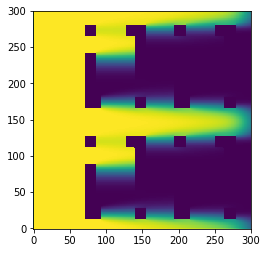

In [30]:
x_res = crossSchema()
plt.imshow(1 - x_res.T)
plt.gca().invert_yaxis()
plt.show()